In [2]:
import pandas as pd

In [3]:
data_csv = pd.read_csv('../data/raw/dataset.csv')

data_csv.head(3)

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN


In [4]:
data_csv.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8'],
      dtype='object')

In [5]:
data_csv.isna().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [6]:
data_csv.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


In [7]:
data_csv.shape

(20000, 15)

In [8]:
data_csv.dtypes

subject     object
body        object
answer      object
type        object
queue       object
priority    object
language    object
tag_1       object
tag_2       object
tag_3       object
tag_4       object
tag_5       object
tag_6       object
tag_7       object
tag_8       object
dtype: object

### Distribution des types de tickets

In [17]:
type_counts = data_csv['type'].value_counts()
print(type_counts)

type
Incident    7978
Request     5763
Problem     4184
Change      2075
Name: count, dtype: int64


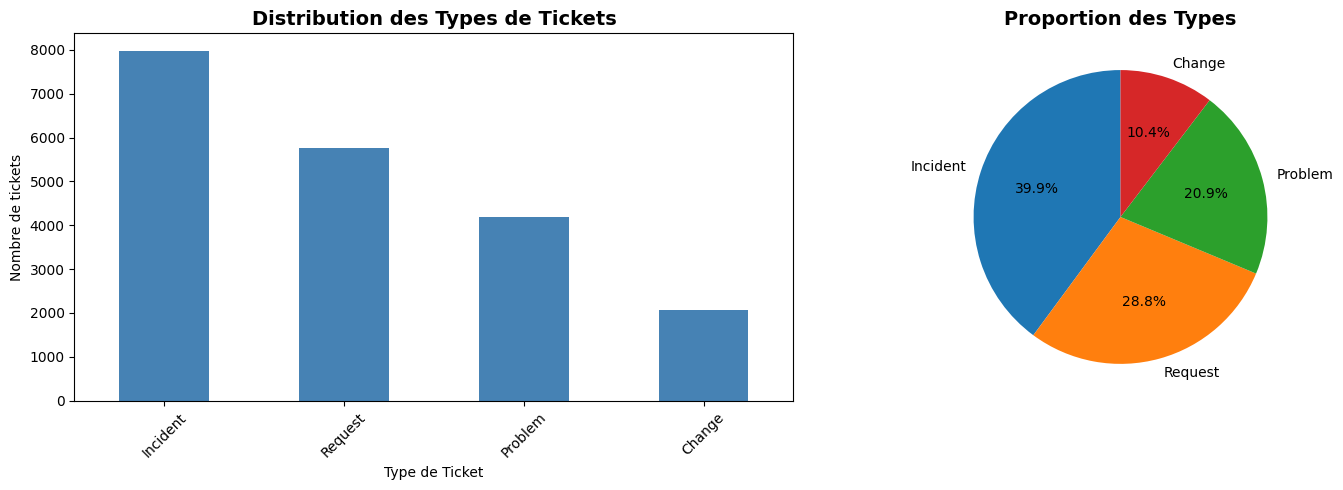

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Barplot
type_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution des Types de Tickets', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de Ticket')
axes[0].set_ylabel('Nombre de tickets')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proportion des Types', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Analyse la longueur du text

In [15]:
new_df = data_csv.copy()

new_df['subject_len'] = data_csv['subject'].str.len()
new_df['body_len'] = data_csv['subject'].str.len()
new_df['total_length'] = new_df['body_len']  + new_df['subject_len'] 

new_df.head(3)

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,subject_len,body_len,total_length
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN,52.0,52.0,104.0
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN,24.0,24.0,48.0
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN,29.0,29.0,58.0


In [16]:
new_df.describe()

,subject_len,body_len,total_length
count,18539.000000,18539.000000,18539.000000
mean,44.872539,44.872539,89.745078
std,18.852377,18.852377,37.704754
min,3.000000,3.000000,6.000000
25%,33.000000,33.000000,66.000000
50%,42.000000,42.000000,84.000000
75%,54.000000,54.000000,108.000000
max,412.000000,412.000000,824.000000


### Fusion des champs texte (subject + body)

In [23]:
new_df['subject_boady'] = data_csv['subject'] + data_csv['body']
new_df.head(3)

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,subject_len,body_len,total_length,subject_boady
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN,52.0,52.0,104.0,Unvorhergesehener Absturz der Datenanalyse-Pla...
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN,24.0,24.0,48.0,Customer Support InquirySeeking information on...
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN,29.0,29.0,58.0,Data Analytics for InvestmentI am contacting y...
